Converged in 7 epochs.
Final weights: [ 0.49304858  0.07455061 -0.3130611 ]


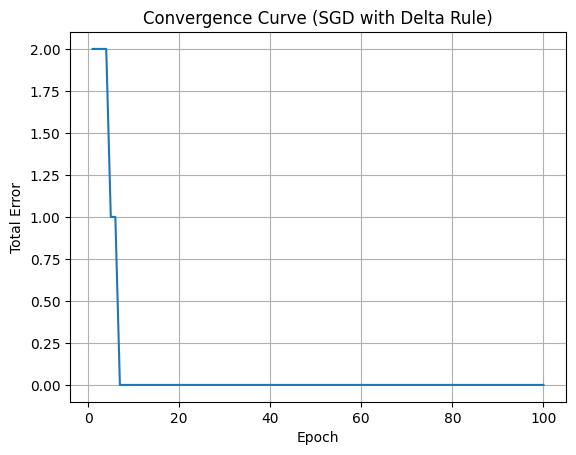

In [3]:
#shahadater code

import numpy as np
import matplotlib.pyplot as plt

# Input and target values
Xinput = np.array([[0, 0, 1],  # Bias included in the third column
                   [0, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1]])

Dtarget = np.array([0, 0, 1, 1])  # Target output

# Initialize weights randomly
weights = np.random.randn(3)
learning_rate = 0.1
epochs = 100

# Activation function (Step function)
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Training using SGD and Delta learning rule
convergence_curve = []
converged=False

for epoch in range(epochs):
    total_error = 0
    
    # Shuffle the data for each epoch (stochastic gradient descent)
    indices = np.random.permutation(len(Xinput))
    Xinput_shuffled = Xinput[indices]
    Dtarget_shuffled = Dtarget[indices]
    
    for i in range(len(Xinput)):
        x = Xinput_shuffled[i]
        d = Dtarget_shuffled[i]
        
        # Forward pass (calculate output)
        y = step_function(np.dot(x, weights))
        
        # Calculate error
        error = d - y
        total_error += abs(error)
        
        # Delta rule: weight update
        weights += learning_rate * error * x
    
    convergence_curve.append(total_error)
    
    # Stop early if there is no error
    if total_error == 0 and converged==False:
        print(f"Converged in {epoch + 1} epochs.")
        converged=True

# Print final weights
print("Final weights:", weights)

# Plot convergence curve
plt.plot(range(1, len(convergence_curve) + 1), convergence_curve)
plt.xlabel('Epoch')
plt.ylabel('Total Error')
plt.title('Convergence Curve (SGD with Delta Rule)')
plt.grid()
plt.show()

Initial weights: [0.89629734 0.15306091 0.33955578]

Epoch 1/10
Sample 1:
  True Target: 0, Prediction: 1, Error: -1
Sample 2:
  True Target: 0, Prediction: 1, Error: -1
Sample 3:
  True Target: 1, Prediction: 1, Error: 0
Sample 4:
  True Target: 1, Prediction: 1, Error: 0

Epoch 2/10
Sample 1:
  True Target: 0, Prediction: 1, Error: -1
Sample 2:
  True Target: 0, Prediction: 1, Error: -1
Sample 3:
  True Target: 1, Prediction: 1, Error: 0
Sample 4:
  True Target: 1, Prediction: 1, Error: 0

Epoch 3/10
Sample 1:
  True Target: 0, Prediction: 0, Error: 0
Sample 2:
  True Target: 0, Prediction: 0, Error: 0
Sample 3:
  True Target: 1, Prediction: 1, Error: 0
Sample 4:
  True Target: 1, Prediction: 1, Error: 0

Epoch 4/10
Sample 1:
  True Target: 0, Prediction: 0, Error: 0
Sample 2:
  True Target: 0, Prediction: 0, Error: 0
Sample 3:
  True Target: 1, Prediction: 1, Error: 0
Sample 4:
  True Target: 1, Prediction: 1, Error: 0

Epoch 5/10
Sample 1:
  True Target: 0, Prediction: 0, Error: 0


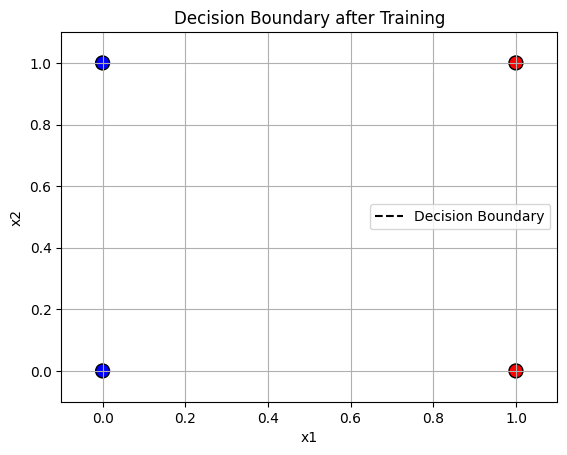

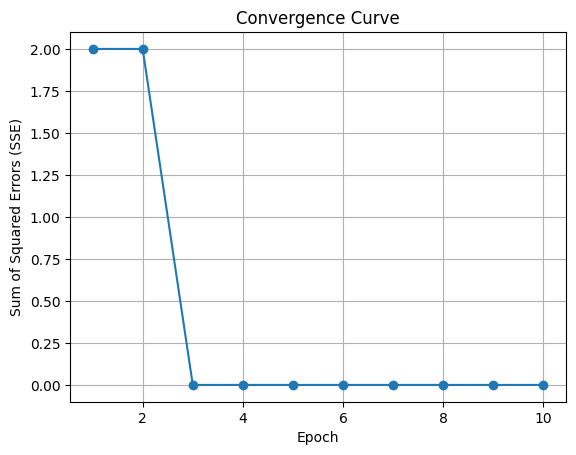

Final Weights after training: [ 0.89629734 -0.04693909 -0.06044422]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the step activation function
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Perceptron using delta rule and SGD with convergence tracking
def perceptron_sgd(X, D, learning_rate=0.1, epochs=10):
    # Initialize weights (including bias)
    weights = np.random.rand(X.shape[1])
    
    print("Initial weights:", weights)
    
    # Store the sum of squared errors (SSE) for each epoch
    sse_history = []
    
    # Training process
    for epoch in range(epochs):
        epoch_sse = 0
        print(f"\nEpoch {epoch + 1}/{epochs}")
        for i in range(X.shape[0]):
            # Forward pass (predict the output)
            y = step_function(np.dot(X[i], weights))
            
            # Calculate the error
            error = D[i] - y
            
            # Accumulate squared error for convergence curve
            epoch_sse += error ** 2
            
            # Print true target, prediction, and error
            print(f"Sample {i + 1}:")
            print(f"  True Target: {D[i]}, Prediction: {y}, Error: {error}")
            
            # Update the weights based on the delta rule
            weights += learning_rate * error * X[i]
        
        # Append the sum of squared errors for this epoch
        sse_history.append(epoch_sse)
    
    return weights, sse_history

# Plotting the decision boundary
def plot_decision_boundary(weights, X, D):
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=D, cmap='bwr', edgecolor='k', s=100)
    
    # Plot decision boundary (w0 + w1*x1 + w2*x2 = 0 => x2 = -(w0 + w1*x1) / w2)
    x_vals = np.linspace(0, 1, 100)
    y_vals = -(weights[0] + weights[1] * x_vals) / weights[2]
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
    
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Decision Boundary after Training')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting the convergence curve
def plot_convergence_curve(sse_history):
    plt.plot(range(1, len(sse_history) + 1), sse_history, marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('Convergence Curve')
    plt.grid(True)
    plt.show()

# Define the input (X) and target (D)
X = np.array([[0, 0, 1],  # Bias term is included as the third input (always 1)
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])
D = np.array([0, 0, 1, 1])  # Target values

# Train the perceptron using the delta rule and SGD
learning_rate = 0.1
epochs = 10
final_weights, sse_history = perceptron_sgd(X, D, learning_rate, epochs)

# Plot the decision boundary after training
plot_decision_boundary(final_weights, X, D)

# Plot the convergence curve
plot_convergence_curve(sse_history)

# Print the final weights
print("Final Weights after training:", final_weights)


Initial weights: [0.82215831 0.02792932 0.64626774]
Final Weights after training: [ 0.82215831 -0.17207068 -0.05373226]


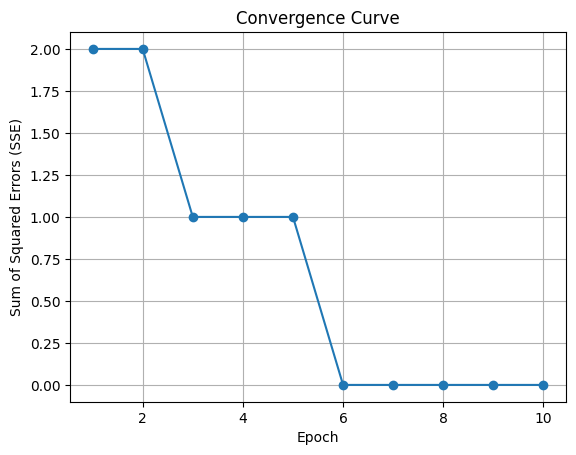


Target vs Predicted Outputs:
Input: [0 0], Target: 0, Predicted: 0
Input: [0 1], Target: 0, Predicted: 0
Input: [1 0], Target: 1, Predicted: 1
Input: [1 1], Target: 1, Predicted: 1


In [5]:
#final code
import numpy as np
import matplotlib.pyplot as plt

# Define the step activation function
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Perceptron using delta rule and SGD with convergence tracking
def perceptron_sgd(X, D, learning_rate=0.1, epochs=10):
    # Initialize weights (including bias)
    weights = np.random.rand(X.shape[1])
    
    print("Initial weights:", weights)
    
    # Store the sum of squared errors (SSE) for each epoch
    sse_history = []
    
    # Training process
    for epoch in range(epochs):
        epoch_sse = 0
        for i in range(X.shape[0]):
            # Forward pass (predict the output)
            y = step_function(np.dot(X[i], weights))
            
            # Calculate the error
            error = D[i] - y
            
            # Accumulate squared error for convergence curve
            epoch_sse += error ** 2
            
            # Update the weights based on the delta rule
            weights += learning_rate * error * X[i]
        
        # Append the sum of squared errors for this epoch
        sse_history.append(epoch_sse)
    
    print("Final Weights after training:", weights)
    return weights, sse_history

# Plotting the convergence curve
def plot_convergence_curve(sse_history):
    plt.plot(range(1, len(sse_history) + 1), sse_history, marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('Convergence Curve')
    plt.grid(True)
    plt.show()

# Define the input (X) and target (D)
X = np.array([[0, 0, 1],  # Bias term is included as the third input (always 1)
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])
D = np.array([0, 0, 1, 1])  # Target values

# Train the perceptron using the delta rule and SGD
learning_rate = 0.1
epochs = 10
final_weights, sse_history = perceptron_sgd(X, D, learning_rate, epochs)

# Plot the convergence curve
plot_convergence_curve(sse_history)

# Print target vs. actual output after training
print("\nTarget vs Predicted Outputs:")
for i in range(X.shape[0]):
    y_pred = step_function(np.dot(X[i], final_weights))
    print(f"Input: {X[i][:2]}, Target: {D[i]}, Predicted: {y_pred}")
